In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    precision_recall_fscore_support, accuracy_score
)

In [ ]:
model_path = 'qsvm_research_model.pkl'
data_path = 'processed_data/NSL_KDD_Test_Cleaned.csv'
# 1. Load Model & Data
data = joblib.load(model_path)
pca, qsvc = data['pca_model'], data['qsvm_model']

test_df = pd.read_csv(data_path)
# Lấy mẫu test cân bằng để đánh giá khách quan
test_sample = pd.concat([
    test_df[test_df['label'] == 0].sample(25, random_state=42),
    test_df[test_df['label'] == 1].sample(25, random_state=42)
])

X_test_pca = pca.transform(test_sample.drop('label', axis=1))
y_true = test_sample['label']

# 2. Dự đoán
y_pred = qsvc.predict(X_test_pca)

# 3. Tính toán Metric chi tiết cho từng lớp
# Trả về: (precision, recall, f1, support) cho từng class
metrics = precision_recall_fscore_support(y_true, y_pred, labels=[0, 1])

print("\n" + "="*50)
print("      ĐÁNH GIÁ CHI TIẾT THEO TỪNG NHÃN (0 & 1)")
print("="*50)

results_df = pd.DataFrame({
    'Chỉ số': ['Precision', 'Recall', 'F1-Score', 'Số mẫu (Support)'],
    'Normal (Lớp 0)': [metrics[0][0], metrics[1][0], metrics[2][0], metrics[3][0]],
    'Attack (Lớp 1)': [metrics[0][1], metrics[1][1], metrics[2][1], metrics[3][1]]
})
print(results_df.to_string(index=False))


      ĐÁNH GIÁ CHI TIẾT THEO TỪNG NHÃN (0 & 1)
          Chỉ số  Normal (Lớp 0)  Attack (Lớp 1)
       Precision        0.750000        0.944444
          Recall        0.960000        0.680000
        F1-Score        0.842105        0.790698
Số mẫu (Support)       25.000000       25.000000



--- Đã lưu biểu đồ ma trận nhầm lẫn: confusion_matrix_qsvm.png ---


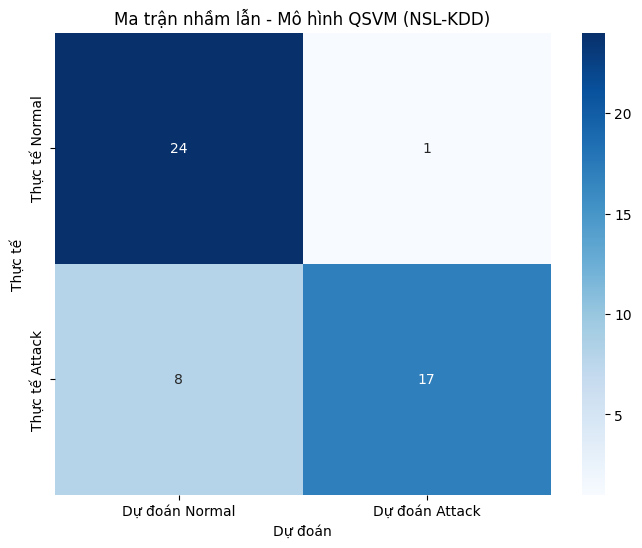

In [ ]:
# 4. Vẽ Confusion Matrix (Dùng cho báo cáo)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dự đoán Normal', 'Dự đoán Attack'],
            yticklabels=['Thực tế Normal', 'Thực tế Attack'])
plt.title('Ma trận nhầm lẫn - Mô hình QSVM (NSL-KDD)')
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.savefig('images/confusion_matrix_qsvm.png') # Lưu ảnh để chèn vào Word
print("\n--- Đã lưu biểu đồ ma trận nhầm lẫn: confusion_matrix_qsvm.png ---")
plt.show()